# Kaggle项目：泰坦尼克号幸存者分析

Kaggle数据科学竞赛网站上最热门的机器学习项目，提供泰坦尼克号乘客的信息（年龄，性别，船舱等级等），以此来建立一个泰坦尼克号幸存者预测模型。

最后更新时间：2018.2.19

作者：Huiting Huang

# 1.数据载入

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#import training examples
data_train = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/train.csv")
data_test = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/train.csv")

#sns.set_style('whitegrid')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()
print("-"*40)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null

In [4]:
# Check duplicates
print "training data:",len(data_train['PassengerId'].unique())
print "testing data:",len(data_test['PassengerId'].unique())

training data: 891
testing data: 891


In [5]:
#Descriptive statistics of training data
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


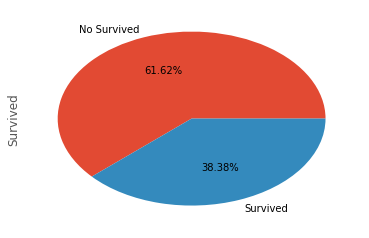

In [6]:
#Plot a pie chart of survived passengers and not survived passengers
data_train['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'],autopct = '%1.2f%%')

# 2. 数据初步分析

# 2.1 获救与否与船舱等级（PClass）的关系

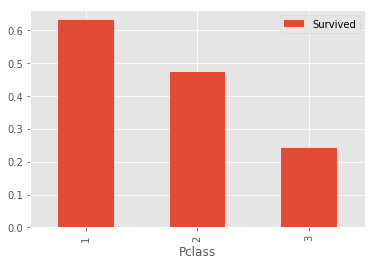

In [7]:
data_train[['Pclass','Survived']].groupby('Pclass').mean().plot(kind = 'bar')

1等舱的获救比例是6成多，明显高于2、3等舱，看来船舱等级是在判断是否获救时要考虑的一个因素（特征）。

# 2.2 获救与否与性别（Sex）的关系

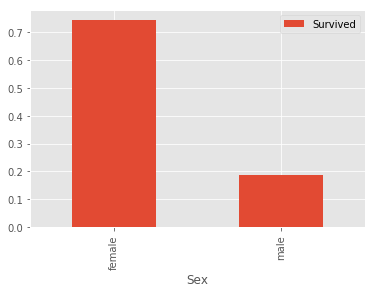

In [8]:
data_train[['Sex','Survived']].groupby('Sex').mean().plot.bar()

由男女获救比例可以看出，“lady first”导致最后女性获救的比例远远高于男性，这是训练模型的时候必须考虑的一个因素

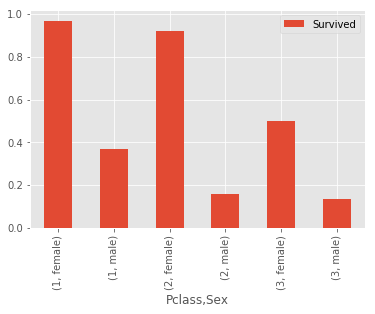

In [9]:
#Present female survival proportion and male survival proportion at each cabin class respectively.
data_train[['Pclass','Sex','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

虽然对不同等级的船舱来说都是女士获救的比例高，但是头等舱和二等舱的女士获救比例还是高于3等舱的。

# 2.3 获救与否与年龄（Age）的关系

In [10]:
len(data_train['Age'].dropna())

714

Text(0.5,0,u'Age')

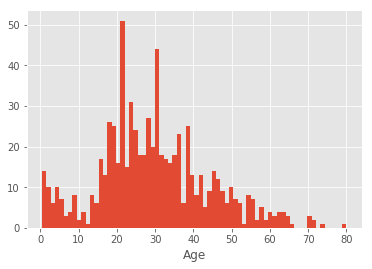

In [11]:
#Distribution of age of passengers
ax = data_train['Age'].hist(bins = 70)
ax.set_xlabel('Age')

(0, 80.0)

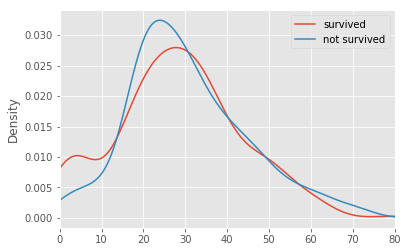

In [12]:
# Probability density distribution of the survived and not survived
plt.figure()
data_train.Age[data_train.Survived == 1].plot(kind = 'kde')
data_train.Age[data_train.Survived == 0].plot(kind = 'kde')

plt.legend(['survived','not survived'])
plt.xlim(0,data_train.Age.max())

从概率密度分布图来看，获救与不获救的人年龄都集中在20-30岁，并不好判断年龄是不是影响获救与否的主要特征，而且年龄这一属性的缺失值很多，这里的分布并不能体现真实的情况，所以要进行进一步分析

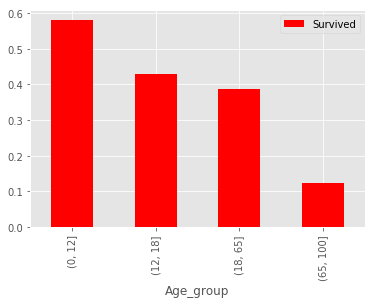

In [15]:
# Proportion of the survived in different age groups
bins = [0,12,18,65,100]
data_train['Age_group'] = pd.cut(data_train['Age'],bins)
ax = data_train.groupby('Age_group').Survived.mean().plot(kind = 'bar',color = 'r')
ax.legend(loc = 'best')

从不同年龄段获救比例来看，年纪越小获救比例越高，说明年龄也是影响最后结果的一个重要特征，需要对缺失值进行准确填充，后面将会选择随机森林预测模型来预测缺失年龄

# 2.4 获救与否与名字（Name）的关系 

In [16]:
# define a function to extract the title of every passenger
def name_cut(name):
    name = name.replace(" ","")
    pre_position = name.find(",")
    fol_position = name.find(".")
    title = name[pre_position+1:fol_position]
    return title

In [17]:
data_train['Title']=data_train['Name'].apply(name_cut)

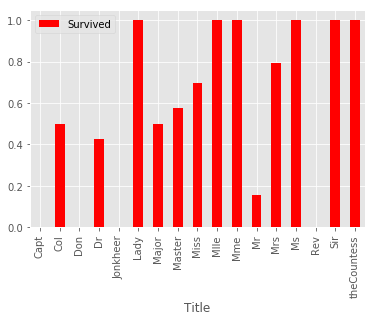

In [18]:
#Plot the number of passengers with different titles
ax = data_train.groupby('Title').Survived.mean().plot(kind='bar',color='r')
ax.legend(loc = 'upper left')

从上图的结果来看，不同的称呼对获救概率的影响还是不同的。但是这些称呼与性别有一定的相关性，如果和性别一样也作为特征入选，有可能会引起过拟合的问题。这里先作为备选特征。

# 2.5 是否获救与有无兄弟姐妹/配偶（SibSp）的关系

In [19]:
# Divide passengers into two groups: with/without siblings
SibSp_df = data_train.Survived[data_train['SibSp']!=0]
no_SibSp_df = data_train.Survived[data_train['SibSp']==0]

Text(0.5,1,u'no_sibsp')

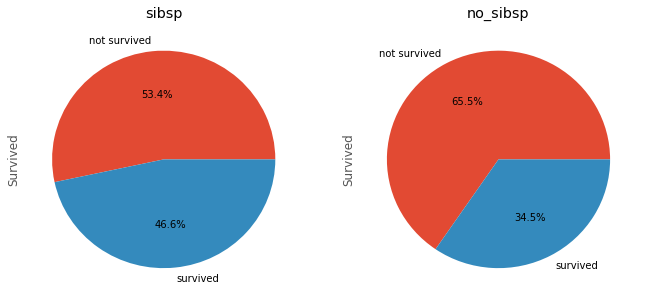

In [20]:
# Plot pie charts of survival porportion in two groups
fig = plt.figure(figsize = (11,5))
ax1 = fig.add_subplot(121)
SibSp_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax1.set_title('sibsp')

ax2 = fig.add_subplot(122)
no_SibSp_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax2.set_title('no_sibsp')

# 2.6 是否获救与有无父母/孩子（Parch）的关系

In [21]:
# Divide passengers into two groups: with/without parents
parch_df = data_train.Survived[data_train['Parch']!=0]
no_parch_df = data_train.Survived[data_train['Parch']==0]

Text(0.5,1,u'no_parch')

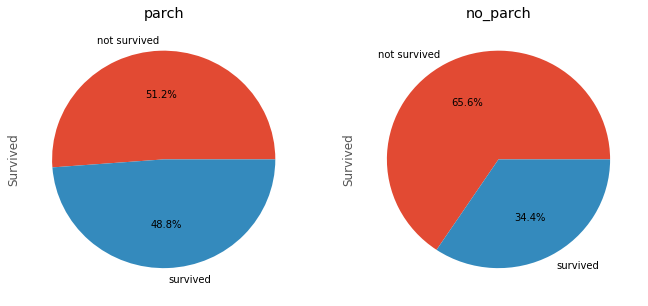

In [22]:
# Plot pie charts of survival porportion in two groups 
fig = plt.figure(figsize = (11,5))
ax1 = fig.add_subplot(121)
parch_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax1.set_title('parch')

ax2 = fig.add_subplot(122)
no_parch_df.value_counts().plot.pie(labels = ['not survived','survived'],autopct = '%1.1f%%')
ax2.set_title('no_parch')

从2.5和2.6的分析来看，无父母和兄弟姐妹的获救比例都比有父母兄弟的要低，接下来将二者结合进一步分析：亲友数对获救的影响

Text(0,0.5,u'Survived')

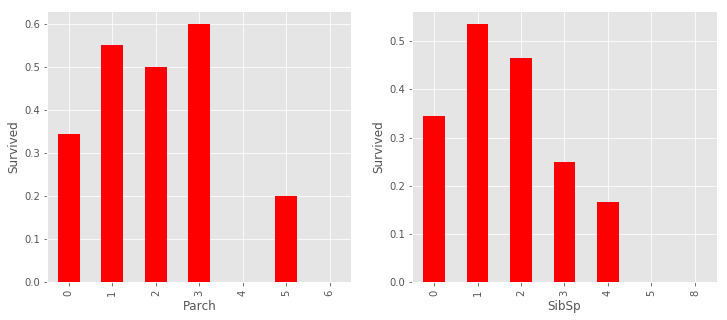

In [24]:
#Plot the survival percentage of passengers with different number of Parch/SibSp
fig,ax = plt.subplots(1,2,figsize=(12,5))
data_train.groupby('Parch').Survived.mean().plot(kind = "bar",ax = ax[0],color = 'r')
ax[0].set_ylabel('Survived')

data_train.groupby('SibSp').Survived.mean().plot(kind = 'bar',ax = ax[1],color = 'r')
ax[1].set_ylabel('Survived')

Text(0,0.5,u'Survived')

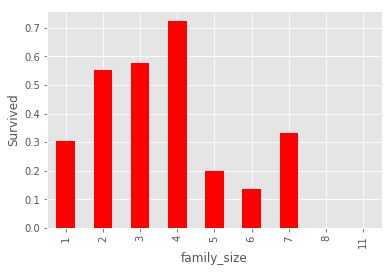

In [26]:
# Add the number of Parch and Sibsp together to get fimaly size 
data_train['family_size']=data_train['Parch']+data_train['SibSp']+1
# plot the proportion of survived passengers of different fimily size
ax = data_train.groupby('family_size').Survived.mean().plot.bar(color = 'r')
ax.set_ylabel('Survived')

从分析结果来看，独自一人和有过多家庭成员的乘客获救比例低于家庭成员较少的乘客。

# 2.7 是否获救与船票（Ticket）的关系

Ticket对于乘客来说应该是unique的，与乘客最后获救关系应该不大，故而这个特征选择舍弃

# 2.8 是否获救与船舱（Fare）的关系

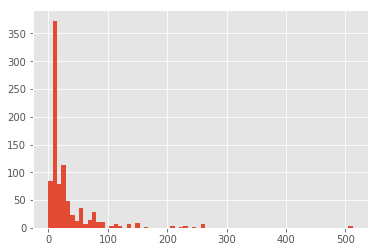

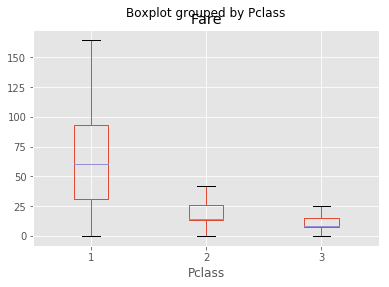

In [27]:
# Distribution of fare
data_train['Fare'].hist(bins=70)
data_train.boxplot(column = 'Fare',by='Pclass',showfliers=False)

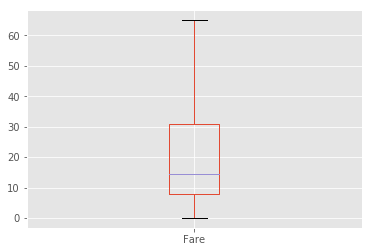

In [28]:
#Descriptive statistics of Fare
data_train.Fare.describe()
data_train.boxplot(column = 'Fare',showfliers=False)

[Text(0,0,u'not survived'), Text(0,0,u'survived')]

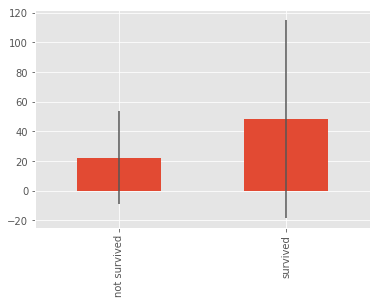

In [29]:
#plot average value and standard deviation of fare for two groups:not survived and survived,respectively.

fare_not_survived = data_train['Fare'][data_train['Survived'] == 0]
fare_survived = data_train['Fare'][data_train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

ax = average_fare.plot(kind = 'bar',yerr = std_fare,legend = False)
ax.set_xticklabels(['not survived','survived'])

从分析结果来看，获救乘客的票价均值要高出为获救乘客，说明票价对于获救与否还是有影响的。但是这一特征与船舱等级这个特征的相关性较高，如果和船舱等级一起入选，有可能会造成过拟合。

# 2.9 是否获救与船舱（Cabin）的关系

In [30]:
# check missing values

len(data_train.Cabin.dropna())

204

In [31]:
# Distribution of cabin
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

Cabin项的缺失数据过多，而且从cabin的分布来看，类型太多太杂，不好分析。从这个角度考虑，这个特征可以直接舍弃。但是Cabin这里的缺失数据，有可能是信息丢失，也有可能有些乘客本身就没有船舱，我们可以分析有无船舱对是否存活的影响。

In [32]:
# plot proportion of the survived in two groups:with or without cabin

#fill missing values with 'u0'

data_train['Cabin']=data_train.Cabin.fillna('U0')

In [33]:
#data_train['Cabin']

[Text(0,0,u'no cabin'), Text(0,0,u'have cabin')]

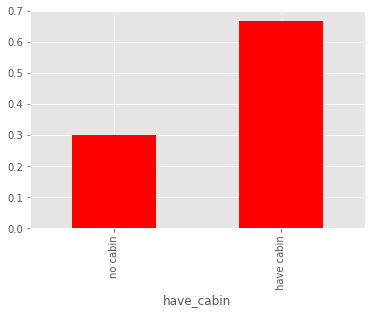

In [34]:
data_train['have_cabin'] = data_train['Cabin'].apply(lambda x:0 if x=='U0' else 1)                                              
ax = data_train.groupby('have_cabin').Survived.mean().plot.bar(color = 'r')
ax.set_xticklabels(['no cabin','have cabin'])

分析结果来看，有无船舱对获救与否还是有影响的。

# 2.10 是否获救与港口（Embarked）的关系

Text(0,0.5,u'Survived')

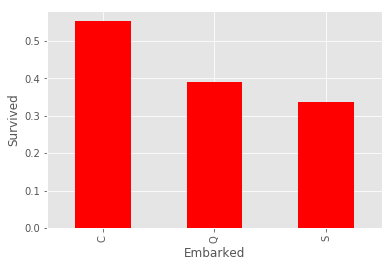

In [36]:
# plot proportion of the survived from different ports embarked

ax = data_train.groupby('Embarked').Survived.mean().plot(kind = 'bar',color='r')
ax.set_ylabel('Survived')

由上可以看出，在不同的港口上船，获救率不同，C最高，Q次之，S最低。

# 2.11 总结

根据以上分析，可以得出一下结论：

1. 船舱等级（Pclass），性别（sex），年龄（Age），称号（Title），有无父母兄弟姐妹（SibSp and Parch），票价（Fare），有无船舱（have_cabin）,登船港口（Embarked）与是否获救都有一定影响。

2. 根据当时“老人孩子和女士优先“的情况，可以确定性别和年龄是非常重要的特征，但年龄的缺失值过多，需要用模型预测来填补缺失值。

3. Cabin的缺失值也非常多，而且对乘客是否获救并没有直接影响，可以考虑直接舍弃。但通过将Cabin分为有和无两类，分析有无船舱对获救与否的关系，发现有无船舱对结果还是有一定影响，故决定保留。

4. Ticket这个特征对于每个乘客应该是unique的，并不能找到和获救的直接联系，而且类目繁杂，故决定舍弃。

5. 称号（Title）这个特征和性别（Sex）有很强的相关性，如果两者同时入选，也许会带来过拟合的问题，故在初步建模中，先决定舍弃。

6. 同理，票价（Fare）和船舱等级（Pclass）也有一定的相关性，但仍然考虑保留，因为也许乘客等级可以根据票价来细分从而优化模型。

入选特征为：船舱等级（Pclass），性别（sex），年龄（Age），有无父母兄弟姐妹（family_size），票价（Fare），有无船舱（have_cabin）,登船港口（Embarked）

# 3.数据预处理

入选特征中一共有两个缺失值：年龄Age和港口Embarked

1.港口Embarked：只有两个缺失值，所以这里采用众数来填补缺失值。

In [37]:
#fill null values in Embarked column
data_train.Embarked[data_train.Embarked.isnull()]=data_train.Embarked.dropna().mode().values

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
len(data_train.Embarked.dropna())

891

2.年龄Age：前面分析过，年龄是非常重要的一个特征，而且缺失值过多，需要用模型预测，这里选用随机森林来预测年龄的缺失值

In [39]:
from sklearn.ensemble import RandomForestRegressor
# choose training data to predict age
age_df = data_train[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[age_df['Age'].notnull()].as_matrix()
age_df_null = age_df.loc[age_df['Age'].isnull()].as_matrix()

X = age_df_notnull[:,1:]
Y = age_df_notnull[:,0]

# use RandomForest classifier to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_null[:,1:])
data_train['Age_filled'] = data_train['Age']
data_train.Age_filled[data_train['Age_filled'].isnull()] = predictAges

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
len(data_train['Age_filled'].dropna())

891

Text(0.5,0,u'Age')

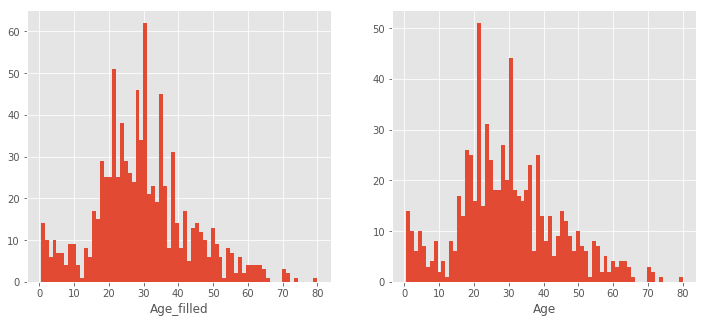

In [41]:
# distribution of filled age and age with missing values
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(121)
data_train.Age_filled.hist(bins = 70)
ax1.set_xlabel('Age_filled')

ax2 = fig.add_subplot(122)
data_train.Age.hist(bins = 70)
ax2.set_xlabel('Age')

从上图中可以看出运用随机森林预测的缺失值集中在20-40这个区间段。

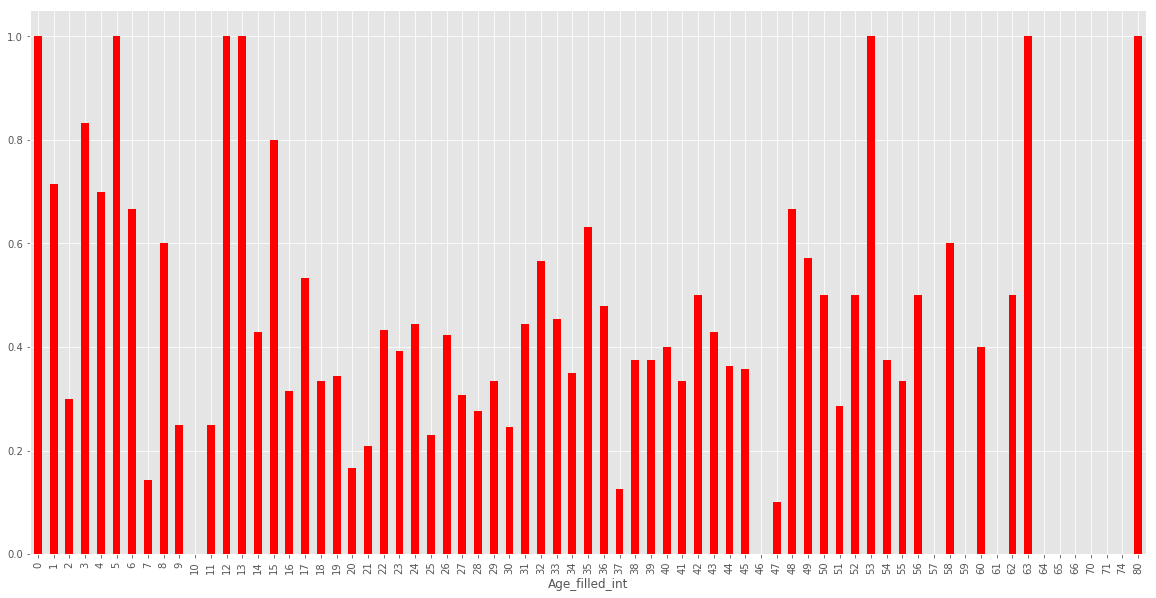

In [43]:
# Plot the survival porportion at different ages
data_train['Age_filled_int'] = data_train['Age_filled'].astype(np.int32)
plt.figure(figsize=(20,10))
data_train.groupby('Age_filled_int').Survived.mean().plot(kind = 'bar',color = 'r')

上图展示了不同年龄的乘客的获救概率，我们可以大致看出，孩子和老人的获救概率会高一些

# 4.特征工程

# 4.1 特征抽象

In [44]:
# Feature abstraction for categorical data: convert categorical variable into dummy/indicator variables

dummies_Embarked = pd.get_dummies(data_train['Embarked'],prefix = 'Embarked')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

dummies_Sex = pd.get_dummies(data_train['Sex'],prefix = 'Sex')

df_feature = pd.concat([data_train, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_feature.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age','Age_group','Title','Parch','SibSp'],axis = 1,inplace = True)

df_feature.head()

,PassengerId,Survived,Fare,family_size,have_cabin,Age_filled,Age_filled_int,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,2,0,22.0,22,0,0,1,0,1,0,0,1
1,2,1,71.2833,2,1,38.0,38,1,0,0,1,0,1,0,0
2,3,1,7.9250,1,0,26.0,26,0,0,1,1,0,0,0,1
3,4,1,53.1000,2,1,35.0,35,0,0,1,1,0,1,0,0
4,5,0,8.0500,1,0,35.0,35,0,0,1,0,1,0,0,1


# 4.2 特征缩放

In [39]:
# feature scaling: The scale of feature Fare and Age is much larger than other features.

import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df_feature['Age_scaled'] = scaler.fit_transform(df_feature['Age_filled'].values.reshape(-1,1))

df_feature['Fare_scaled'] = scaler.fit_transform(df_feature['Fare'].values.reshape(-1,1))

df_feature.head()


,PassengerId,Survived,Fare,family_size,have_cabin,Age_filled,Age_filled_int,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,7.2500,2,0,22.0,22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.561284,-0.502445
1,2,1,71.2833,2,1,38.0,38,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.612777,0.786845
2,3,1,7.9250,1,0,26.0,26,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.267769,-0.488854
3,4,1,53.1000,2,1,35.0,35,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.392640,0.420730
4,5,0,8.0500,1,0,35.0,35,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.392640,-0.486337


# 4.3 预处理测试数据

In [40]:
# preprocess test dataset in the same way as how the training data is preprocessed

#feature:family_size
data_test['family_size'] = data_test['SibSp']+data_test['Parch']

#feature:have_cabin
data_test['Cabin'] = data_test['Cabin'].fillna('U0')
data_test['have_cabin']=data_test.Cabin.apply(lambda x: 0 if x == 'U0' else 1)

#feature:embarked,Pclass and Sex

dummies_Embarked_test = pd.get_dummies(data_test['Embarked'],prefix = 'Embarked')

dummies_Pclass_test = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

dummies_Sex_test = pd.get_dummies(data_test['Sex'],prefix = 'Sex')

df_test = pd.concat([data_test, dummies_Embarked_test, dummies_Sex_test, dummies_Pclass_test], axis=1)

#feature:age
df_test_age = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
df_test_isnull = df_test_age.loc[df_test_age['Age'].isnull()].as_matrix()

predictAges_test = RFR.predict(df_test_isnull[:,1:])
data_test['Age_filled'] = data_test['Age']
data_test.Age_filled[data_test['Age_filled'].isnull()] = predictAges_test

print len(data_test.Age_filled.dropna())

df_test['Age_scaled'] = scaler.fit_transform(data_test['Age_filled'].values.reshape(-1,1))

#feature:fare
data_test.Fare[data_test.Fare.isnull()]=data_test.Fare.dropna().mode().values

df_test['Fare_scaled'] = scaler.fit_transform(data_test['Fare'].values.reshape(-1,1))

df_test.head()

418


D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.306847,-0.497063
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.255051,-0.511926
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.392895,-0.463754
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.262074,-0.482127
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.641356,-0.417151


# 5.逻辑回归建模

In [41]:
from sklearn import linear_model

# extract all the features we need to create training dataset
df_train = df_feature.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')
#print df_train.head()

Y = df_train.values[:,0]
X = df_train.values[:,1:]

# Build a logistic regression model 
clf = linear_model.LogisticRegression()
clf.fit(X,Y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# 6.预测测试数据的获救情况

In [118]:
x_test = df_test.filter(regex='Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')

#print x_test.head()

test_age_predictions = clf.predict(x_test.values)
result = pd.DataFrame({'PassengerId':df_test.PassengerId.values,'Survived':test_age_predictions.astype(np.int32)})
#print result
result.to_csv("/Users/emma/Desktop/2018/data/project/Titanic/logistic_regression_predictions.csv", index=False)


# Score of my first submission in Kaggle:0.75598


# 7.模型优化

# 7.1 模型评估

从测试结果来看，模型并不是非常好。尝试从一下几个角度分析一下原因：


# 7.1.1 模型参数系数

In [43]:
# Retrieve coefficients of features in the classifying model

pd.DataFrame({"columns":list(df_train.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.246162147648],family_size
1,[0.919800175044],have_cabin
2,[0.235782400637],Embarked_C
3,[0.19308593692],Embarked_Q
4,[-0.213484519638],Embarked_S
5,[1.43187604328],Sex_female
6,[-1.21649222537],Sex_male
7,[0.676265802319],Pclass_1
8,[0.365367105088],Pclass_2
9,[-0.826249089488],Pclass_3


从上表可以看出，权重比较大的feature有:
1. 有无船舱会较为明显地影响获救结果，这个特征与最终结果正相关；但是根据上文的分析，还是有一些有船舱的乘客遇难了，说明也许我们对这个属性还需要细分，单纯地划分有无船舱太过粗放了。
2. 性别特征对获救结果影响非常大，女性获救概率大大超过男性。
3. 1，2 等船舱与被救结果正相关，末等舱与被救结果负相关。
4. 被救结果与年龄呈负相关，这个特征与结果的关系并不是非常准确
5. 高票价对被救结果有一点正面影响，但几乎可以忽略不及，从我们之前的分析来看，Fare和Pclass的相关性是很强的，Pclass对结果的相关性很高，但Fare的影响这么弱，说明对这个特征挖掘地不够

# 7.1.2 交叉验证

先用交叉验证评分查看模型的模拟情况：

In [44]:
from sklearn import cross_validation

# Test the score of cross validation of all training data
X = df_train.as_matrix()[:,1:]
y = df_train.as_matrix()[:,0]
clf_cv = linear_model.LogisticRegression()
print cross_validation.cross_val_score(clf_cv,X,Y,cv = 5)

[ 0.81564246  0.80446927  0.79213483  0.79775281  0.81355932]


从交叉验证的结果来看，模型的对于训练数据的拟合度约在80%。接下来对训练数据按7:3的比例分隔成训练数据和用来做交叉验证的数据，然后查看bad cases。

In [45]:
#split training data into two sets by 7:3,one for training and another one for cross validation
split_train_ori, split_cv_ori = cross_validation.train_test_split(df_feature, test_size=0.3, random_state=0)
split_train = split_train_ori.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')
split_cv = split_cv_ori.filter(regex='Survived|Age_scaled|family_size|Fare_scaled|have_cabin|Embarked_.*|Sex_.*|Pclass_.*')

#train the classifier
clf.fit(split_train.as_matrix()[:,1:], split_train.as_matrix()[:,0])

#predict survivals of cross validation dataset
cv_predictions = clf.predict(split_cv.as_matrix()[:,1:])
cv_pred_result = pd.DataFrame({'PassengerId':split_cv_ori.PassengerId.values,'Survived':cv_predictions.astype(np.int32)})

origin_data_train = pd.read_csv("/Users/emma/Desktop/2018/data/project/Titanic/train.csv")

#Retrieve bad cases about predictions in cross validation set
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(cv_pred_result.PassengerId[cv_pred_result['Survived']!=split_cv['Survived']].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C


除了观察bad cases，还有一个重要的评估手段是学习曲线，来判断现有模型是过拟合还是欠拟合。

# 7.1.3 学习曲线

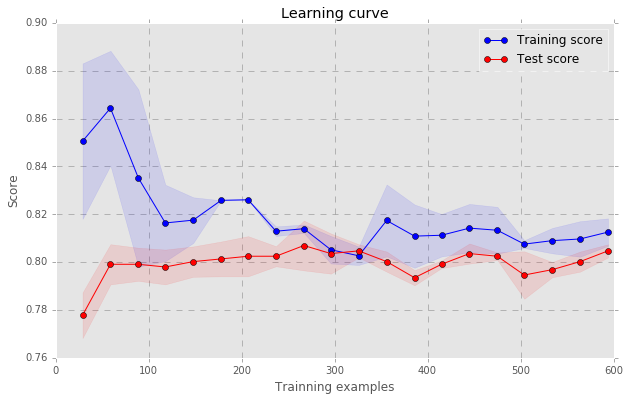

In [46]:
# Plotting learning curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    train_sizes,train_scores,test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Trainning examples")
    plt.ylabel("Score")
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")

    plt.legend(loc="best")
    
    #plt.draw()
    #plt.show()
    #plt.gca().invert_yaxis()

plot_learning_curve(clf, "Learning curve", X, y)

从学习曲线看出，模型的训练结果还有待提高，处于欠拟合状态，原因可能如下：

1. 特征选取得不够多，比如属性Name以及衍生属性Title可以考虑加入训练特征，可以考虑再做些特征工程的工作，选取更多的特征，或者对已选特征优化处理。

2. 年龄拟合并不能保证很高的准确率，而且根据孩子与老人优先的施救原则，如果把年龄作为一个连续值变量，并不能明显地体现出年龄对获救结果的影响。所以将连续变量年龄按年龄段离散化，也许更合适一些。

# 7.2 模型优化

根据以上分析，我们可以尝试对训练特征从以下几个方面进行优化：

1.将Name加入训练特征，按照每位乘客的称呼（Mr.,Mrs,Capt,Sir等）进行分类

In [184]:
# Categorize passengers by their titles

#print data_train.Title.unique()

title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'theCountess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

df_feature['Title'] = data_train['Title'].map(title_Dict)
#df_feature.Title.unique()

data_test['Title']=data_test['Name'].apply(name_cut)
df_test['Title'] = data_test['Title'].map(title_Dict)

Title_train_test = df_feature['Title'].append(df_test['Title'])
Title_id = pd.factorize(Title_train_test)[0]

df_feature['Title'] = Title_id[:891]
df_test['Title'] = Title_id[891:]

2.将Age这个连续变量离散化，将乘客按照不同的年龄段划分

In [125]:
# Categorize passengers into different age groups
bins = [0,12,18,65,100]
data_train['Age_group'] = pd.cut(data_train['Age_filled'],bins)
data_train['Age_group'].astype(str)
Age_group_dict = {'(0, 12]':0,'(12, 18]':1,'(18, 65]':2,'(65, 100]':3}

data_train['Age_group'] = data_train['Age_group'].map(Age_group_dict)
df_feature['Age_group'] = data_train['Age_group']

data_test['Age_group'] = pd.cut(data_test['Age_filled'],bins)
df_test['Age_group'] = data_test['Age_group'].map(Age_group_dict)

3.将Fare这个连续变量也离散化

In [177]:
# Divide all fares into quartiles
Fare_train_test = data_train['Fare'].append(data_test['Fare'])

data_Fare_bin = pd.qcut(Fare_train_test, 5)
data_Fare_bin_id = pd.factorize(data_Fare_bin)[0]

df_feature['Fare_bin_id'] = data_Fare_bin_id[:891]
df_test['Fare_bin_id'] = data_Fare_bin_id[891:]

4.不再对Cabin进行“有无”的粗放划分，对有记录的Cabin，按照前面字母部分划分不同的Cabin种类

In [178]:
# create feature for the alphabetical part of the cabin number
import re

data_train['CabinLetter'] = data_train['Cabin'].apply( lambda x : re.compile("([a-zA-Z]+)").match(x).group())
#data_train['CabinLetter'].unique()
data_test['CabinLetter'] = data_test['Cabin'].apply( lambda x : re.compile("([a-zA-Z]+)").match(x).group())

# convert the distinct cabin letters with incremental integer values
data_train['Cabin_num'] = pd.factorize(data_train['CabinLetter'])[0]
df_feature['Cabin_num'] = data_train['Cabin_num']

data_test['Cabin_num'] = pd.factorize(data_test['CabinLetter'])[0]
df_test['Cabin_num'] = data_test['Cabin_num']

5.再次建模

In [203]:
# Create logistic regression classifier and predict passengers to be survived or not in test dataset
df_train_opt = df_feature.filter(regex='Survived|family_size|Embarked_.*|Sex_.*|Pclass_.*|Title|Age_group|Cabin_num|Fare_bin_id')

Y_opt = df_train_opt.values[:,0]
X_opt = df_train_opt.values[:,1:]

# Build an optimized logistic regression model 
clf_opt = linear_model.LogisticRegression()
clf_opt.fit(X_opt,Y_opt)

x_test_opt = df_test.filter(regex='Survived|family_size|Embarked_.*|Sex_.*|Pclass_.*|Title|Age_group|Cabin_num|Fare_bin_id')

test_age_predictions_opt = clf_opt.predict(x_test_opt.values)
result_opt = pd.DataFrame({'PassengerId':df_test.PassengerId.values,'Survived':test_age_predictions_opt.astype(np.int32)})
#print result
result_opt.to_csv("E:/data/project/Titanic/logistic_regression_predictions_opt.csv", index=False)


# Score of my optimized submission in Kaggle:0.76076

# 7.3. 模型融合

用scikit-learn里面的Bagging来完成模型融合

In [205]:
# Perform model ensembleing by using Bagging package in sklearn
from sklearn.ensemble import BaggingRegressor

clf = linear_model.LogisticRegression()
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X_opt, Y_opt)

predictions_ME = bagging_clf.predict(x_test_opt)
result_ME = pd.DataFrame({'PassengerId':df_test.PassengerId.values, 'Survived':predictions_ME.astype(np.int32)})
result_ME.to_csv("E:/data/project/Titanic/logistic_regression_bagging_predictions.csv", index=False)

# Score of my optimized submission by model ensembling in Kaggle:0.77511

# 8. 总结

本项目通过对泰坦尼克号乘客相关数据的分析，用逻辑回归的算法建立了一个生存者预测模型，模型的准确率目前在0.77511,模型优化后还是有一些些提高吧。后续可以就以下几点问题做出改进：
1. 本项目选取训练特征时，是从对各个属性数据分析入手辅以经验进行的筛选，这种方法在优化模型的时候要进行大量的尝试。更为高效的方法可以用GridSearchCV 利用不同的模型来对特征进行筛选，选出较为重要的特征。
2. Age的缺失值拟合也应该用模型融合方法来提高拟合的准确度。在训练年龄模拟模型的时候，为了保证模型可以用于测试数据集中的年龄缺失值模拟，其中一个重要特征"Survived"没有入选，其原因是这是Kaggle的竞赛项目，测试数据集中的"Survived"数据竞赛者无法知道，所以年龄模拟应该是存在比较大的误差。
3. 本项目建模只用到了逻辑回归这一个机器学习算法，为了继续优化模型的预测能力，可以进一步进行模型融合，利用多种不同的机器学习算法来预测生存者的情况。